In [ ]:
# Import required libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Load the Flowers dataset with train-test split
(train_dataset, test_dataset), info = tfds.load("tf_flowers", split=["train[:80%]", "train[80%:]"], as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


This section imports TensorFlow, TensorFlow Datasets, NumPy, and Matplotlib libraries. It then loads the "tf_flowers" dataset from TensorFlow Datasets, splitting it into training and test datasets in an 80-20 ratio. The as_supervised=True argument ensures that the dataset is loaded with image-label pairs. The with_info=True argument retrieves additional information about the dataset, which is stored in the info variable.

In [ ]:
# Normalize and resize images
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))
    image = image / 255.0  # Normalize pixel values
    return image, label

A preprocessing function preprocess is defined to resize the input image to a size of (128, 128) pixels using TensorFlow's tf.image.resize function. The pixel values of the image are then normalized by dividing them by 255.0 to bring them into the range [0, 1].

In [ ]:
# Preprocess and batch the train and test datasets
train_dataset = train_dataset.map(preprocess).shuffle(buffer_size=len(train_dataset)).batch(32)
test_dataset = test_dataset.map(preprocess).batch(32)

The training and test datasets are preprocessed using the preprocess function and then batched into groups of 32 examples each. The shuffle operation shuffles the training dataset using a buffer of length equal to the number of examples in the training dataset.

In [ ]:
# Create a simple fully connected neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(info.features["label"].num_classes, activation='softmax')
])

A sequential model is created using TensorFlow's Keras API. It consists of a flatten layer to reshape the input images, followed by two fully connected (dense) layers with ReLU activation functions. The last dense layer has a number of units equal to the number of classes in the dataset, with a softmax activation function for multi-class classification.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The model is compiled with the Adam optimizer, the sparse_categorical_crossentropy loss function for multi-class classification, and accuracy as the evaluation metric.

In [ ]:
# Train the model
model.fit(train_dataset, epochs=5)

Epoch 1/5
92/92 [==============================] - 17s 102ms/step - loss: 3.3494 - accuracy: 0.3379
Epoch 2/5
92/92 [==============================] - 13s 123ms/step - loss: 1.4576 - accuracy: 0.4356
Epoch 3/5
92/92 [==============================] - 11s 109ms/step - loss: 1.6019 - accuracy: 0.4513
Epoch 4/5
92/92 [==============================] - 13s 127ms/step - loss: 1.3104 - accuracy: 0.4935
Epoch 5/5
92/92 [==============================] - 14s 142ms/step - loss: 1.2037 - accuracy: 0.5334


The model is trained using the fit method on the train_dataset for 5 epochs.

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print('\nTest accuracy:', test_acc)

23/23 - 2s - loss: 1.4325 - accuracy: 0.4169 - 2s/epoch - 84ms/step

Test accuracy: 0.41689372062683105


The trained model is evaluated on the test dataset, and the test loss and test accuracy are computed and printed.

In [ ]:
# Display test images along with predictions
def plot_images(predictions, images, labels, num_rows=4, num_cols=4):
    plt.figure(figsize=(12, 12))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(f"Predicted: {info.features['label'].int2str(predictions[i])}\nActual: {info.features['label'].int2str(labels[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

A function plot_images is defined to visualize test images along with their predicted and actual labels. It displays a grid of images with corresponding labels.

23/23 [==============================] - 1s 18ms/step


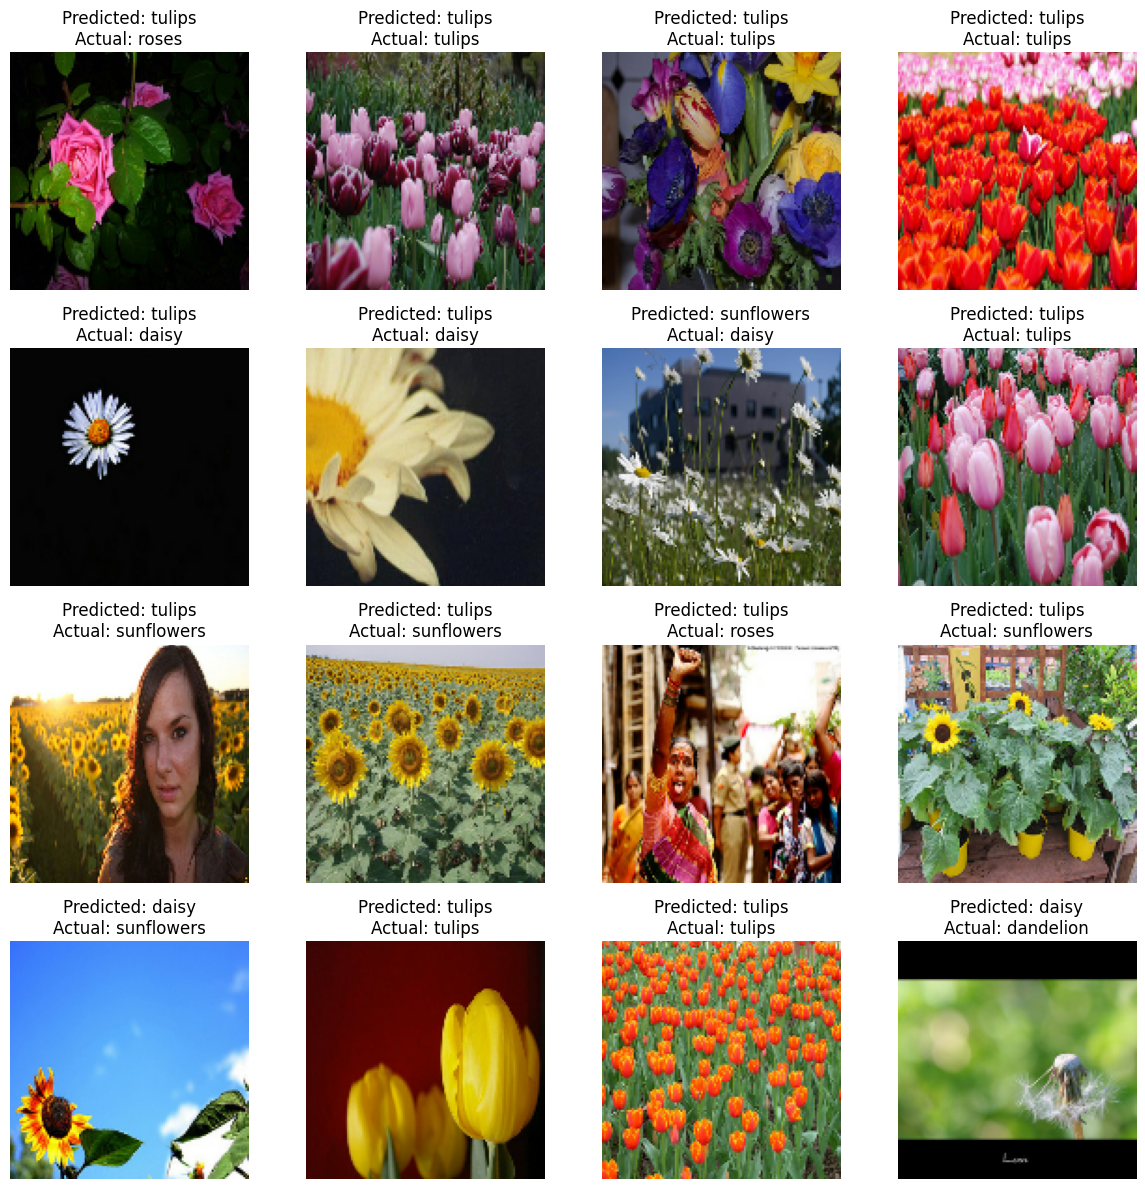

In [ ]:
# Get test images and labels
test_images = []
test_labels = []
for image, label in test_dataset:
    test_images.append(image.numpy())
    test_labels.append(label.numpy())
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

# Get model predictions for test images
predictions = model.predict(test_images)

# Display images along with predictions
plot_images(np.argmax(predictions, axis=1), test_images, test_labels)

The test images and labels are extracted from the test_dataset, and model predictions are computed using the predict method. Finally, the plot_images function is used to visualize the test images with their predicted and actual labels.

## What is the need of Resizing the image and what is shuffling with buffer?

Resizing and shuffling with a buffer size are common preprocessing steps in machine learning pipelines. Let's understand why these steps are needed in the context of the provided code:

1. **Resizing Images**:
   The resizing of images to a consistent size (in this case, (128, 128) pixels) serves multiple purposes:
   - **Uniform Input Size**: Neural networks require input data of uniform size. Resizing ensures that all images have the same dimensions, making it possible to feed them into the network.
   - **Computational Efficiency**: Processing images of consistent size simplifies computations within the neural network layers, leading to more efficient training.
   - **Reduces Memory Consumption**: Smaller images require less memory, which can be crucial when dealing with large datasets.

2. **Shuffling with a Buffer Size**:
   Shuffling the training dataset with a buffer size before each epoch is a technique that introduces randomness into the order of examples presented to the model during training. This randomness has several benefits:
   - **Reduced Bias**: Shuffling prevents the model from learning the order or patterns present in the dataset, which helps reduce the risk of the model learning unwanted biases.
   - **Improved Convergence**: Randomizing the order of examples can lead to faster convergence during training, as the model encounters a diverse set of examples in each batch.
   - **Effective Minimization**: Shuffling helps the optimizer explore different areas of the loss landscape, potentially finding better weight updates and leading to a more accurate and robust model.

The buffer size used in shuffling determines how many examples are loaded into memory at a time. A larger buffer size can introduce more randomness and improve shuffling effectiveness but requires more memory. In the provided code, the buffer size is set to the length of the training dataset (`len(train_dataset)`), which means the entire training dataset is shuffled.

By combining resizing and shuffling, the code ensures that the images are prepared in a standardized format and that the training process is not biased by the order of examples, leading to better model performance and generalization.

## Why have we used Sparse categorical cross-entropy?

Sparse categorical cross-entropy (sparse categorical entropy) is commonly used as the loss function for multi-class classification problems, where each input belongs to one of several classes. In the provided code, sparse categorical cross-entropy is used as the loss function when compiling the neural network model. Let's understand why sparse categorical cross-entropy is chosen for this scenario:

1. **Single-Label Classification**:
   The Flowers dataset is a single-label classification problem, meaning each image belongs to only one class (e.g., one type of flower). In single-label classification, the ground truth labels are represented as integers (class indices).

2. **One-Hot vs. Sparse Encoding**:
   In multi-class classification, labels are typically encoded either using one-hot encoding or sparse encoding. One-hot encoding creates a binary vector for each example, where the index corresponding to the true class is marked as 1, and all other indices are marked as 0. Sparse encoding uses integer class indices directly, without expanding them into binary vectors.

3. **Efficiency and Memory Usage**:
   Sparse categorical cross-entropy is preferred when working with a large number of classes, as it is more memory-efficient compared to one-hot encoding. One-hot encoding would require a separate binary vector for each example and class combination, leading to high memory consumption.

4. **Loss Calculation**:
   Sparse categorical cross-entropy calculates the loss by comparing the predicted class probabilities with the true class indices. It essentially computes the cross-entropy loss between the predicted probabilities and the ground truth class indices.

5. **Activation Function**:
   In the output layer of the neural network, a softmax activation function is used. This activation function produces class probabilities that sum up to 1. The class with the highest probability is considered the predicted class for an input.

In summary, sparse categorical cross-entropy is chosen in this code because it is well-suited for multi-class classification tasks with a large number of classes. It efficiently handles the loss calculation and memory usage while allowing the use of integer class indices. This makes it a suitable choice for the Flowers dataset, where each image corresponds to a single flower class among several possibilities.